In [22]:
from nba_api.stats.endpoints import playercareerstats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nba_api.stats.static import players

# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()

# Show all columns
pd.options.display.max_columns = None

def cleanCarData(name):
    """
    This function cleans the data for a given player and removes any duplicate rows from the dataframe
    based on the SEASON_ID column. It also includes the total row for each season and sorts the data by SEASON_ID.
    """
    # get player data
    player = getPlayerID(name)
    player = plotPlayerStats(player)

    # drop any duplicate rows
    player_drop = player.drop_duplicates()

    # get the 'TOT' rows for each season
    player_tot = player_drop[player_drop['TEAM_ABBREVIATION'] == 'TOT']

    # remove any duplicate SEASON_ID rows that are not 'TOT'
    player_dup = player_drop.duplicated(subset=['SEASON_ID'], keep=False)
    out = player[~player_dup]

    # combine the 'TOT' rows with the cleaned dataframe and sort by SEASON_ID
    out_tot = pd.concat([out, player_tot])
    return out_tot.sort_values(by=['SEASON_ID'])


def plotPlayerStats(id):
    """Returns a dataframe containing the player's career statistics."""
    career = playercareerstats.PlayerCareerStats(player_id=id)
    return career.get_data_frames()[0]


def getPlayerID(Name):
    """Returns the player ID for a given player name."""
    nba_players = players.get_players()
    ID = [player for player in nba_players
          if player['full_name'] == Name][0]
    return ID['id']


def plotPts(player):
    """Plots the player's points per game over time."""
    plot_stats(plotPlayerStats(getPlayerID(player)),['PTS'])
    
def plotCarStats(player):
    """Plots the player's career statistics over time."""
    plotPlayerStats(getPlayerID(player))

def plot_stats(df, stat_list):
    """
    Plots multiple stats over time for a given DataFrame.
    The stat_list parameter should be a list of column names to plot.
    """
    # create a new DataFrame with only the specified columns
    stat_df = df[stat_list + ['SEASON_ID']]

    # set the index to the season ID column
    stat_df.set_index('SEASON_ID', inplace=True)

    # plot each stat on a separate axis
    fig, ax = plt.subplots(figsize=(20, 10))
    for i, stat in enumerate(stat_list):
        # plot the stat on the current axis
        ax.plot(stat_df.index, stat_df[stat], label=stat, color=plt.cm.get_cmap('Set1')(i/len(stat_list)))
        ax.tick_params(axis='y', labelcolor=plt.cm.get_cmap('Set1')(i/len(stat_list)))
        
    # set axis labels and title
    ax.set_xlabel('Season', fontsize=20)
    ax.set_ylabel('Stats', fontsize=20)
    ax.set_title('Stats over time', fontsize=24)
    
    # set the y axis limits and ticks
    ax.set_ylim([0, df[stat_list].max().max()])
    y_ticks = np.arange(0, df[stat_list].max().max(), df[stat_list].max().max() / 5)
    ax.set_yticks(y_ticks)
    ax.tick_params(axis='both', labelsize=16)
    
    # create a legend for the plot
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='upper left', fontsize=16)

    # adjust the layout of the plot
    plt.subplots_adjust(left=0.15, bottom=0.15)

    # rotate x-axis labels
    plt.xticks(rotation=90)

    # show the plot
    plt.show()

    
def plotPAR(player):
    """Plot a player's career PTS AST and REB."""
    plot_stats(player,['PTS','AST','REB'])
    
def graphCumStats(player):
    """Given a player DF, create cumlative columns and graph them"""
    player['TOT_PTS'] = player['PTS'].cumsum()
    player['TOT_AST'] = player['AST'].cumsum()
    player['TOT_REB'] = player['REB'].cumsum()
    
    # plot graph
    plot_stats(player,['TOT_PTS','TOT_AST','TOT_REB'])

In [25]:
def graphCareer(name):
    plotPAR(cleanCarData(name))
    display(cleanCarData(name))
    graphCumStats(cleanCarData(name))

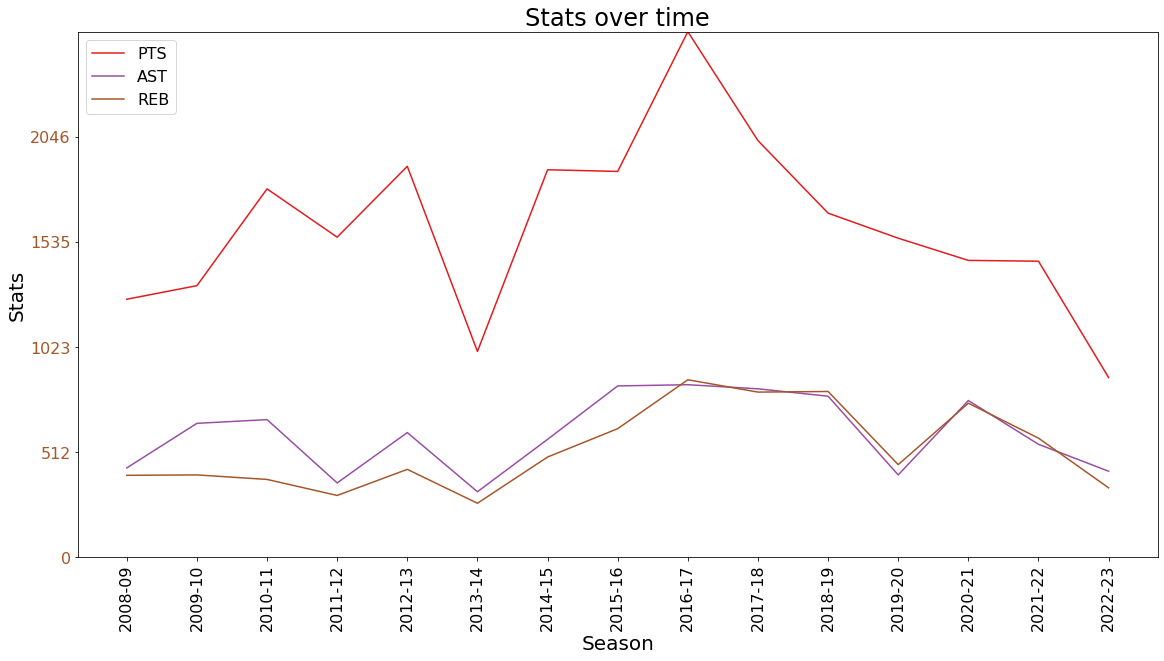

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201566,2008-09,00,1610612760,OKC,20.0,82,65,2668.0,436,1095,0.398,35,129,0.271,349,428,0.815,178,221,399,435,110,16,274,191,1256
1,201566,2009-10,00,1610612760,OKC,21.0,82,82,2813.0,485,1160,0.418,23,104,0.221,329,422,0.780,143,258,401,652,108,34,268,204,1322
2,201566,2010-11,00,1610612760,OKC,22.0,82,82,2847.0,614,1390,0.442,34,103,0.330,531,631,0.842,121,258,379,670,155,30,316,207,1793
3,201566,2011-12,00,1610612760,OKC,23.0,66,66,2331.0,578,1266,0.457,62,196,0.316,340,413,0.823,96,205,301,362,112,21,239,147,1558
4,201566,2012-13,00,1610612760,OKC,24.0,82,82,2861.0,673,1535,0.438,97,300,0.323,460,575,0.800,111,317,428,607,145,24,273,189,1903
5,201566,2013-14,00,1610612760,OKC,25.0,46,46,1412.0,346,791,0.437,68,214,0.318,242,293,0.826,55,208,263,319,88,7,177,104,1002
6,201566,2014-15,00,1610612760,OKC,26.0,67,67,2302.0,627,1471,0.426,86,288,0.299,546,654,0.835,124,364,488,574,140,14,293,184,1886
7,201566,2015-16,00,1610612760,OKC,27.0,80,80,2750.0,656,1444,0.454,101,341,0.296,465,573,0.812,145,481,626,834,163,20,342,200,1878
8,201566,2016-17,00,1610612760,OKC,28.0,81,81,2802.0,824,1941,0.425,200,583,0.343,710,840,0.845,137,727,864,840,132,31,438,190,2558
9,201566,2017-18,00,1610612760,OKC,29.0,80,80,2914.0,757,1687,0.449,97,326,0.298,417,566,0.737,152,652,804,820,147,20,381,200,2028


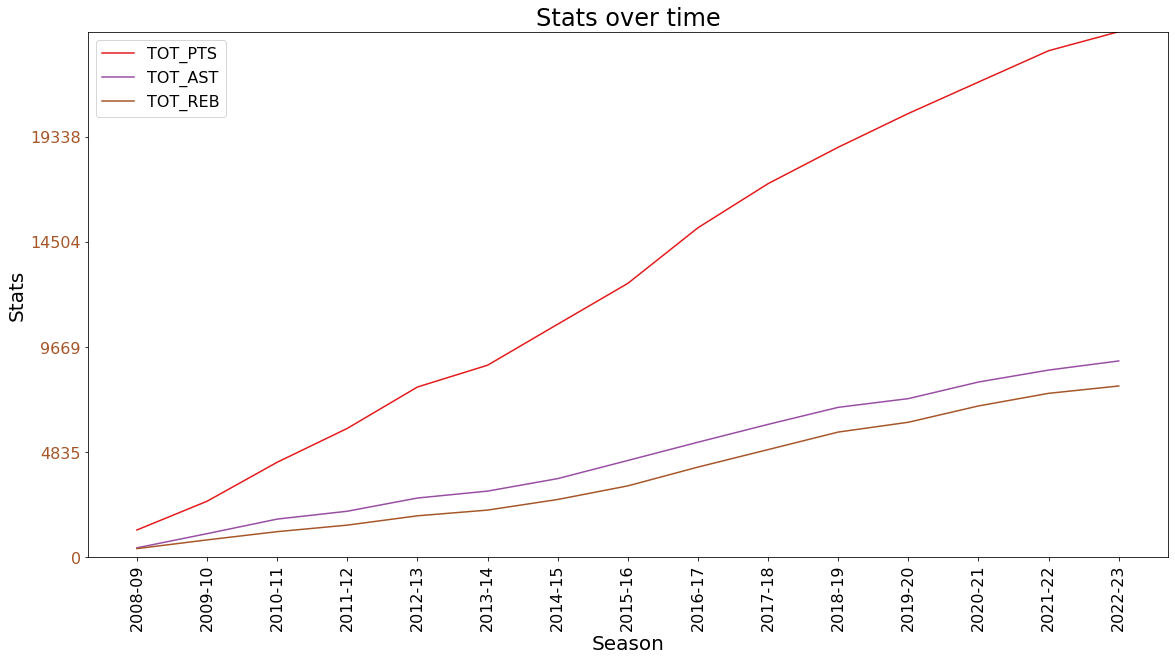

In [26]:
graphCareer('Russell Westbrook')